In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

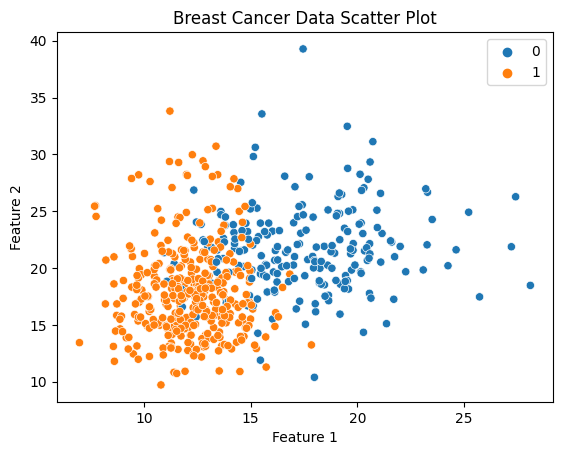

In [32]:
# Create a scatter plot of two features
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Breast Cancer Data Scatter Plot')

# Show the plot
plt.show()


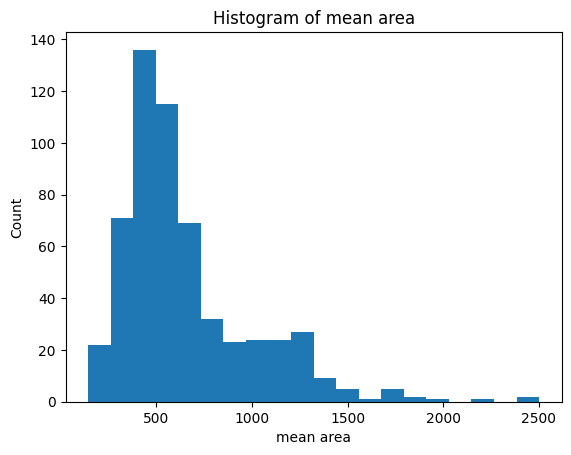

In [33]:
# Select a feature to plot
feature_index = 3
feature_name = data.feature_names[feature_index]
feature_data = X[:, feature_index]

# Create a histogram of the feature values
plt.hist(feature_data, bins=20)

# Add labels and title
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.title('Histogram of {}'.format(feature_name))

# Show the plot
plt.show()


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Define LightGBM model
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)

# Train LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions on the testing set using both models
xgb_preds = xgb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)

# Combine predictions from both models using a simple average
hybrid_preds = (xgb_preds + lgb_preds) / 2
# Convert hybrid_preds into binary labels
hybrid_binary_preds = np.where(hybrid_preds > 0.5, 1, 0)
# Evaluate the accuracy of the hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_binary_preds)
print('Hybrid model accuracy:', hybrid_accuracy)


Hybrid model accuracy: 0.9649122807017544
